# Gradient Ascent

## One dimensional example

Below is the plot of a function in one dimension, and a point `theta=-8`.

$$f(\theta) = -\theta^2 +10\theta -3$$

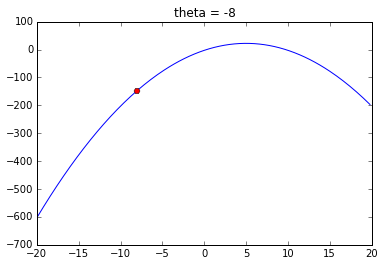

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def myfunc(theta):
    return -theta**2+10*theta-3

def plot_1d_func(f, thetavalues, thetamark):
    """plot a function f, and put a red dot at xmark"""
    yvalues = map(f, thetavalues)
    plt.plot(thetavalues, yvalues)
    plt.plot([thetamark], [f(thetamark)], 'rH')
    plt.title('theta = '+str(thetamark))
    plt.show()
    
plot_1d_func(myfunc, np.arange(-20, 20, 0.2), -8)

At `x=-3`, we ascend by moving in the direction of the slope at that point. Since `f'(theta) = -2theta+10`, the slope at -8 is 26. If the learning rate is 0.8, the new x becomes `-8+26*0.8 = 12.8`.

We can keep going until the value of `f(theta)` does not change very much from the previous step. This suggests we have converged at the top.

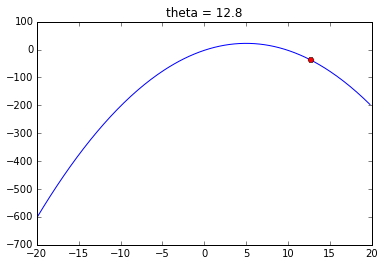

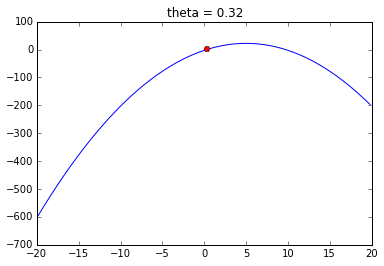

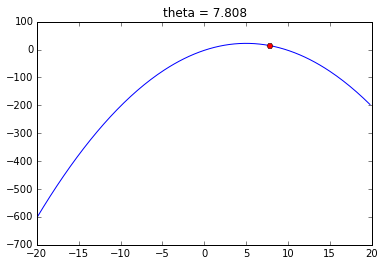

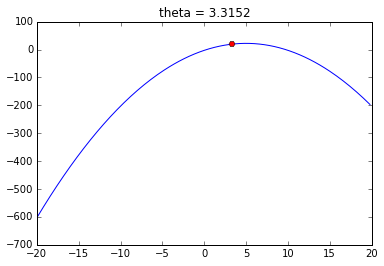

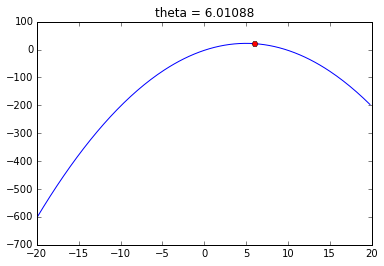

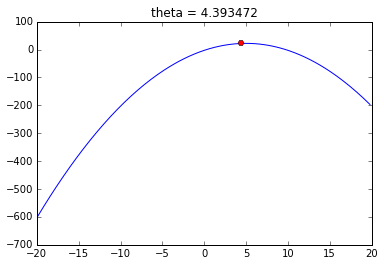

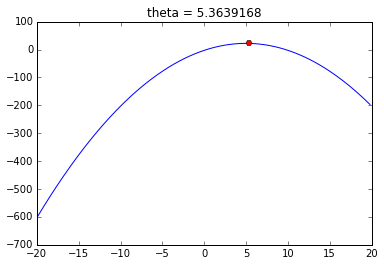

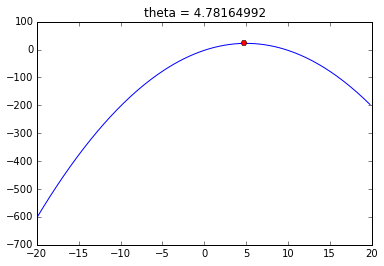

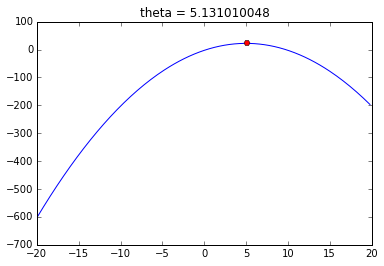

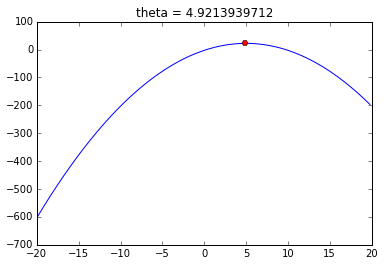

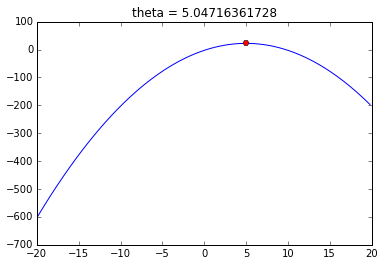

In [115]:
old_f = -1e100 # make it very small so it enters while loop
theta = -8
eta = 0.8
epsilon = 0.01
while abs(myfunc(theta)-old_f)>epsilon:  # not converged
    old_f = myfunc(theta)
    theta += eta*(-2*theta+10)  # move in direction of gradient by learning rate
    plot_1d_func(myfunc, np.arange(-20, 20, 0.2), theta)

You can see the gradient ascent procedure moves back and forth, before converging at `theta~=5`. 

In this case, we could have just solved for the maximum analytically, but it's a demonstration of how gradient ascent works.

## Multi-dimensional example

Consider `theta` in two dimensions, and a function:

$f(\theta) = -\theta_1^2 - 2\theta_2^2$

where $\theta_i$ refers to the ith dimension of $\theta$.

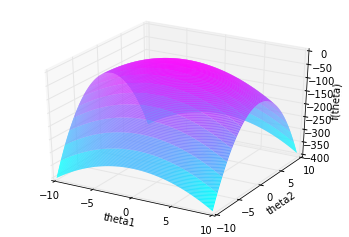

In [109]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_2d_func(theta1values, theta2values):
    """plot f(theta) shown above"""
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    theta1values, theta2values = np.meshgrid(theta1values, theta2values)
    yvalues = -theta1values**2-3*theta2values**2 # applying f
    ax.plot_surface(theta1values, theta2values, yvalues, cstride=1, cmap=cm.cool, linewidth=0)

    ax.set_xlabel('theta1')
    ax.set_ylabel('theta2')
    ax.set_zlabel('f(theta)')
    
    plt.show()
    
plot_2d_func(np.arange(-10, 10, .1), np.arange(-10, 10, .1))


(I don't know how to add a mark to a 3-d plot in matplotlib, so imagine a mark at `theta = [10, -10]` in the lower right corner.)

To get the gradient of this function, we compute the partial derivative along each dimension:

$\dfrac{\partial}{\partial \theta_1}f(\theta) = -2\theta_1$
$\dfrac{\partial}{\partial \theta_2}f(\theta) = -6\theta_2$

The gradient is given by the 2-d vector $[\dfrac{\partial}{\partial \theta_1}f(\theta), \dfrac{\partial}{\partial \theta_2}f(\theta)]$

Just like in the 1-d case, we update `theta` by the gradient scaled by the learning rate. If our intial `theta=[10, -10]`, the gradient at the point is `[-2*10, -6*-10] = [-20, 60]`. With a learning rate of, say, 0.3, the new `theta` becomes `[10, -10] + 0.3*[-20, 60] = [10-6, -10+18] = [4, 8]`.

Below is the gradient ascent procedure for this example, sans the plots.

In [119]:
def my2dfunc(theta):
    return -theta[0]**2-3*theta[1]**2

old_f = -1e100 # make it very small so it enters while loop
theta = [10, -10]
eta = 0.3
epsilon = 0.01
print 'theta=', theta,
while abs(my2dfunc(theta)-old_f)>epsilon:  # not converged
    old_f = my2dfunc(theta)
    print 'f(theta)=', old_f
    gradient = np.array([-2*theta[0], -6*theta[1]])  # move in direction of gradient by learning rate
    theta += eta*gradient
    print 'theta=', theta, 
print

theta= [10, -10] f(theta)= -400
theta= [ 4.  8.] f(theta)= -208.0
theta= [ 1.6 -6.4] f(theta)= -125.44
theta= [ 0.64  5.12] f(theta)= -79.0528
theta= [ 0.256 -4.096] f(theta)= -50.397184
theta= [ 0.1024  3.2768] f(theta)= -32.22274048
theta= [ 0.04096 -2.62144] f(theta)= -20.6175207424
theta= [ 0.016384  2.097152] f(theta)= -13.1944079688
theta= [ 0.0065536 -1.6777216] f(theta)= -8.44429225099
theta= [ 0.00262144  1.34217728] f(theta)= -5.40432642479
theta= [  1.04857600e-03  -1.07374182e+00] f(theta)= -3.45876561333
theta= [  4.19430400e-04   8.58993459e-01] f(theta)= -2.21360946477
theta= [  1.67772160e-04  -6.87194767e-01] f(theta)= -1.41670997301
theta= [  6.71088640e-05   5.49755814e-01] f(theta)= -0.906694369215
theta= [  2.68435456e-05  -4.39804651e-01] f(theta)= -0.580284394136
theta= [  1.07374182e-05   3.51843721e-01] f(theta)= -0.371382011901
theta= [  4.29496730e-06  -2.81474977e-01] f(theta)= -0.237684487561
theta= [  1.71798692e-06   2.25179981e-01] f(theta)= -0.152118072

`theta` converges at approximately `[0, 0]`, which is correct.